# CAPSTONE SUBMISSION BY HARUN KHALID

#  

# PROBLEM STATEMENT

I am a an analyst looking to help investors start a fast casual Indian restaurant in the DFW area. Through this analysis I am looking to identify the ideal neighborhood for this purpose.

<b>DATA SOURCES</b>

Dallas City Statistics: https://www.bestplaces.net/find/zip.aspx?msa=19100&st=tx &  https://www.niche.com
<br><br> Dallas Neighborhoods Latitude & Longitude Data: https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/ </br>
<br><br>Dallas Higher Educational Institution Data (Colleges & Universities): </br><br>https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_the_Dallas%E2%80%93Fort_Worth_metroplex </br>

# IMPORTING PACKAGES REQUIRED FOR PROJECT

In [549]:
# library to handle requests
import requests

#importing beautifulsoup for pulling data via webscraping
from bs4 import BeautifulSoup

# library for data analsysis
import pandas as pd

# library to handle data in a vectorized manner
import numpy as np

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# importing package to assign colors on maps
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import lxml.html as lh

#For caluclating weighted averages
import math

#to properly format downloaded csv
import io

# Geographic locations - latitiude and longitude
from geopy.geocoders import Nominatim 

Solving environment: ...working... done

# All requested packages already installed.



In [550]:
#Specifying broswer options for extraction when using Selenium
option = webdriver.ChromeOptions()
option.add_argument("--incognito")
#option.add_argument("--headless") #this option runs the scraping job behind the scenes. Activate this option to run the web scraping jobs behind the scenes
option.add_experimental_option("excludeSwitches", ["enable-automation"])
option.add_experimental_option('useAutomationExtension', False) #disables webbrowser notification stating that it is being controlled by automated software

# GATERING DATA FOR DALLAS FORTWORTH AREA

The Dallas_Statistics_Extractor_1.ipynb script below will gather median age, climate index for cities in the DFW area. We want to see a status code of 200 for every cit to ensure the webpage loaded properly prior to data extraction.

The script initially pulls data at a zipcode level. We then create a dataset with one row per city by taking a weighted average of the statistics using population of the zipcodes as the weight.Check script for further details

In [551]:
%run DFW_Statistics_Extractor_1.ipynb

Addison (zip 75001), Texas  has status code 200 and data scraping complete!
Allen (zip 75002), Texas  has status code 200 and data scraping complete!
Carrollton (zip 75006), Texas  has status code 200 and data scraping complete!
Carrollton (zip 75007), Texas  has status code 200 and data scraping complete!
Celina (zip 75009), Texas  has status code 200 and data scraping complete!
Carrollton (zip 75010), Texas  has status code 200 and data scraping complete!
Allen (zip 75013), Texas  has status code 200 and data scraping complete!
Coppell (zip 75019), Texas  has status code 200 and data scraping complete!
Flower Mound (zip 75022), Texas  has status code 200 and data scraping complete!
Plano (zip 75023), Texas  has status code 200 and data scraping complete!
Plano (zip 75024), Texas  has status code 200 and data scraping complete!
Plano (zip 75025), Texas  has status code 200 and data scraping complete!
Flower Mound (zip 75028), Texas  has status code 200 and data scraping complete!
Rock

Dallas (zip 75220), Texas  has status code 200 and data scraping complete!
Dallas (zip 75223), Texas  has status code 200 and data scraping complete!
Dallas (zip 75224), Texas  has status code 200 and data scraping complete!
University Park (zip 75225), Texas  has status code 200 and data scraping complete!
Dallas (zip 75226), Texas  has status code 200 and data scraping complete!
Dallas (zip 75227), Texas  has status code 200 and data scraping complete!
Dallas (zip 75228), Texas  has status code 200 and data scraping complete!
Dallas (zip 75229), Texas  has status code 200 and data scraping complete!
Dallas (zip 75230), Texas  has status code 200 and data scraping complete!
Dallas (zip 75231), Texas  has status code 200 and data scraping complete!
Dallas (zip 75232), Texas  has status code 200 and data scraping complete!
Dallas (zip 75233), Texas  has status code 200 and data scraping complete!
Farmers Branch (zip 75234), Texas  has status code 200 and data scraping complete!
Dallas (

Fort Worth (zip 76107), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76108), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76109), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76110), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76111), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76112), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76114), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76115), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76116), Texas  has status code 200 and data scraping complete!
Haltom City (zip 76117), Texas  has status code 200 and data scraping complete!
Richland Hills (zip 76118), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76119), Texas  has status code 200 and data scraping complete!
Fort Worth (zip 76120), Texas  has status code 

In [552]:
df_dallas_stats.head()

,Neighborhood,Population,Unemployment_Rate,Median_Income,Median_Home_Price,Median_Age,Climate_Comfort_Index,Zipcode
0,Addison,14617.0,3.7,59745.000000,343500.000000,32.900000,7.1,75001
1,Aledo,16334.0,3.1,104215.000000,321400.000000,37.800000,7.3,76008
2,Allen,108663.0,3.2,106827.706312,340801.826749,36.309752,7.2,75002
3,Alvarado,21049.0,3.5,51372.000000,175900.000000,36.500000,7.3,76009
4,Alvord,3313.0,3.5,63700.000000,195100.000000,36.700000,7.5,76225


#We will now import statistics such as Population, Median_Household_Income, Median_Home_Value etc. from https://www.niche.com and join it to the dataset that was created by running the script above

In [553]:
#%run DFW_Statistics_Extractor_2.ipynb

Importing Data from csv that was created by running the script above multiple times. The script get stopped out by recaptcha

In [554]:
df_dallas_stats2=pd.read_csv('DFW_Statistics_Niche.csv')

In [555]:
len(df_dallas_stats2)

134

In [556]:
df_dallas_stats2.head()

,neighborhood,neighborhood_description,niche_grade,population,median_home_value,median_rent,median_household_income,public_school_grade,crime_grade,housing_grade,nightlife_grade,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade
0,Dallas,City in Texas,A-,"1,318,806","$169,400",$987,"$50,100",B-,C,B-,A,B+,A+,B,B+,B,B-,B+,B+
1,Fort Worth,City in Texas,A-,"855,786","$154,300","$1,015","$59,255",C+,C,B-,B+,B+,A+,B+,B+,B+,C+,B-,B
2,Arlington,City in Texas,A-,"392,462","$157,600",$997,"$58,502",B,C,B,B+,A-,A+,B+,B+,B+,B-,B,B-
3,Plano,City in Texas,A+,"284,579","$291,300","$1,330","$92,121",A+,B-,A-,A,A+,A+,A+,B+,B,A,B-,B
4,Irving,City in Texas,A,"238,637","$165,000","$1,086","$61,937",B+,C+,B,A,A,A+,A-,B+,B+,B-,B,B+


In [ ]:
df=pd.merge(df_dallas_stats[['Unemployment_Rate','Median_Age','Climate_Comfort_Index','Zipcode','Neighborhood']], df_dallas_stats2, how='right', left_on='Neighborhood', right_on='neighborhood')

In [558]:
#From this point, df will be the main dataframe
del df_dallas_stats
del df_dallas_stats2

In [559]:
list(df.columns)

['Unemployment_Rate',
 'Median_Age',
 'Climate_Comfort_Index',
 'Zipcode',
 'Neighborhood',
 'neighborhood',
 'neighborhood_description',
 'niche_grade',
 'population',
 'median_home_value',
 'median_rent',
 'median_household_income',
 'public_school_grade',
 'crime_grade',
 'housing_grade',
 'nightlife_grade',
 'good_for_families_grade',
 'diversity_grade',
 'jobs_grade',
 'weather_grade',
 'cost_of_living_grade',
 'health_grade',
 'outdoor_activities_grade',
 'commute_grade']

In [560]:
df.dtypes

Unemployment_Rate           float64
Median_Age                  float64
Climate_Comfort_Index       float64
Zipcode                      object
Neighborhood                 object
neighborhood                 object
neighborhood_description     object
niche_grade                  object
population                   object
median_home_value            object
median_rent                  object
median_household_income      object
public_school_grade          object
crime_grade                  object
housing_grade                object
nightlife_grade              object
good_for_families_grade      object
diversity_grade              object
jobs_grade                   object
weather_grade                object
cost_of_living_grade         object
health_grade                 object
outdoor_activities_grade     object
commute_grade                object
dtype: object

In [561]:
#Reorganizing columns
df=df[['Neighborhood','neighborhood_description','Zipcode','population','median_household_income','median_home_value',
       'median_rent','Unemployment_Rate','Median_Age','Climate_Comfort_Index','niche_grade','public_school_grade',
       'crime_grade','housing_grade','nightlife_grade','good_for_families_grade','diversity_grade','jobs_grade','weather_grade','cost_of_living_grade','health_grade','outdoor_activities_grade',
       'commute_grade']]

In [562]:
#Converting all alphabetical grades to numeric grades in preparation for data normalization prior to running models on the dataset

df['niche_grade'] = df['niche_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['public_school_grade'] = df['public_school_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['crime_grade'] = df['crime_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['housing_grade'] = df['housing_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['nightlife_grade'] = df['nightlife_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['good_for_families_grade'] = df['good_for_families_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['diversity_grade'] = df['diversity_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['jobs_grade'] = df['jobs_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['weather_grade'] = df['weather_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['cost_of_living_grade'] = df['cost_of_living_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['health_grade'] = df['health_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['outdoor_activities_grade'] = df['outdoor_activities_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})
df['commute_grade'] = df['commute_grade'].map({'A+': 14, 'A': 13, 'A-': 12, 'B+':11, 'B':10, 'B-': 9 , 'C+': 8 , 'C':7 , 'C-': 6 , 'D+': 5, 'D': 4 , 'D-':3, 'F':2, 'NG': 7})

In [563]:
df.head(10)

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,housing_grade,nightlife_grade,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade
0,Addison,"Suburb of Dallas, TX",75001,"15,626","$73,383","$325,100","$1,294",3.7,32.900000,7.100000,...,8,14,11,13,12,11,9,13,9,12
1,Allen,"Suburb of Dallas, TX",75002,"99,255","$106,736","$286,300","$1,456",3.2,36.309752,7.200000,...,12,9,14,13,14,11,10,12,9,9
2,Alvarado,Town in Texas,76009,"4,044","$46,268","$104,800",$824,3.5,36.500000,7.300000,...,9,8,8,11,11,11,12,9,7,8
3,Arlington,City in Texas,76001,"392,462","$58,502","$157,600",$997,3.5,33.894161,7.136118,...,10,11,12,14,11,11,11,9,10,9
4,Azle,"Suburb of Fort Worth, TX",76020,"12,149","$65,295","$139,400",$921,3.5,43.200000,7.200000,...,12,8,11,10,12,11,12,10,8,7
5,Balch Springs,"Suburb of Dallas, TX",75180,"25,312","$48,295","$94,800",$991,4.3,26.800000,7.200000,...,9,9,8,13,10,11,12,10,7,7
6,Bedford,"Suburb of Fort Worth, TX",76021,"49,306","$66,636","$198,300","$1,066",3.4,40.300076,7.100000,...,11,10,13,13,12,11,11,11,8,10
7,Benbrook,"Suburb of Fort Worth, TX",76126,"22,961","$71,281","$168,700",$978,3.5,40.600000,7.200000,...,11,11,11,11,12,11,12,12,9,10
8,Burleson,"Suburb of Fort Worth, TX",76028,"44,629","$77,342","$167,100","$1,229",3.3,36.900000,7.300000,...,12,9,12,11,12,11,11,10,8,8
9,Carrollton,"Suburb of Dallas, TX",75006,"133,438","$75,820","$217,700","$1,175",3.2,36.792577,7.100000,...,11,13,13,14,12,11,10,11,8,11


In [564]:
#Removing ',' sign from Population to avoid errors when converting to numeric
df["population"]=df["population"].str.replace(",","")
#Converting population to numeric value
df['population']=pd.to_numeric(df['population'])

#Removing '$' sign from Median Home Value to avoid errors when converting to numeric
df["median_home_value"]=df["median_home_value"].str.replace("$","")
#Removing ',' sign from Median Home Value to avoid errors when converting to numeric
df["median_home_value"]=df["median_home_value"].str.replace(",","")
#Converting Median Home Value to numeric value
df['median_home_value']=pd.to_numeric(df['median_home_value'])

#Removing '$' sign from Median Rent to avoid errors when converting to numeric
df["median_rent"]=df["median_rent"].str.replace("$","")
#Removing ',' sign from Median Rent to avoid errors when converting to numeric
df["median_rent"]=df["median_rent"].str.replace(",","")
#Converting Median Home Value to numeric value
df['median_rent']=pd.to_numeric(df['median_rent'])

#Removing '$' sign from Median Household Income to avoid errors when converting to numeric
df["median_household_income"]=df["median_household_income"].str.replace("$","")
#Removing ',' sign from Median Household Income to avoid errors when converting to numeric
df["median_household_income"]=df["median_household_income"].str.replace(",","")
#Converting Median Home Value to numeric value
df['median_household_income']=pd.to_numeric(df['median_household_income'])


In [565]:
df.head()

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,housing_grade,nightlife_grade,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade
0,Addison,"Suburb of Dallas, TX",75001,15626,73383,325100,1294,3.7,32.900000,7.100000,...,8,14,11,13,12,11,9,13,9,12
1,Allen,"Suburb of Dallas, TX",75002,99255,106736,286300,1456,3.2,36.309752,7.200000,...,12,9,14,13,14,11,10,12,9,9
2,Alvarado,Town in Texas,76009,4044,46268,104800,824,3.5,36.500000,7.300000,...,9,8,8,11,11,11,12,9,7,8
3,Arlington,City in Texas,76001,392462,58502,157600,997,3.5,33.894161,7.136118,...,10,11,12,14,11,11,11,9,10,9
4,Azle,"Suburb of Fort Worth, TX",76020,12149,65295,139400,921,3.5,43.200000,7.200000,...,12,8,11,10,12,11,12,10,8,7


In [566]:
df_nulls=df[df['Median_Age'].isnull()]

In [567]:
# Determining number of cities that are in Niche and not in the bestplaces dataset
len(df_nulls)

56

In [568]:
#Looking at Max values for cities in Niche data that didn't appear in the bestpalces data with values for Median Age, Climate Comfort Index etc.
#The max population of city without data from best places is 22,873
df_nulls.loc[df_nulls['population'].idxmax()]

Neighborhood                                     NaN
neighborhood_description    Suburb of Fort Worth, TX
Zipcode                                          NaN
population                                     22873
median_household_income                        79625
median_home_value                             148400
median_rent                                     1283
Unemployment_Rate                                NaN
Median_Age                                       NaN
Climate_Comfort_Index                            NaN
niche_grade                                       11
public_school_grade                               11
crime_grade                                        8
housing_grade                                     10
nightlife_grade                                    8
good_for_families_grade                           11
diversity_grade                                   12
jobs_grade                                        11
weather_grade                                 

In [569]:
#Deleting temp dataframe that was created to analyse null values
del df_nulls

In [622]:
#Removing cities from dataset to test for which we don't have ratings on niche.
df=df.loc[~df['Median_Age'].isnull()].reset_index(drop=True)

In [623]:
#Check to make sure nulls have been removed from the main dataframe
df[df['Median_Age'].isnull()]

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count_x,Shakeshack_Count_y


In [572]:
#Determining how many cities are remaining in the main dataframe post removal of nulls
len(df)

78

In [573]:
df.dtypes

Neighborhood                 object
neighborhood_description     object
Zipcode                      object
population                    int64
median_household_income       int64
median_home_value             int64
median_rent                   int64
Unemployment_Rate           float64
Median_Age                  float64
Climate_Comfort_Index       float64
niche_grade                   int64
public_school_grade           int64
crime_grade                   int64
housing_grade                 int64
nightlife_grade               int64
good_for_families_grade       int64
diversity_grade               int64
jobs_grade                    int64
weather_grade                 int64
cost_of_living_grade          int64
health_grade                  int64
outdoor_activities_grade      int64
commute_grade                 int64
dtype: object

In [574]:
#Taking a look at distribution of cities by population
df.sort_values(by=['population'], ascending=False).head(40)

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,housing_grade,nightlife_grade,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade
15,Dallas,City in Texas,75201,1318806,50100,169400,987,3.6,32.552906,7.083905,...,9,13,11,14,10,11,10,9,11,11
26,Fort Worth,City in Texas,76052,855786,59255,154300,1015,3.6,32.726637,7.135108,...,9,11,11,14,11,11,11,8,9,10
3,Arlington,City in Texas,76001,392462,58502,157600,997,3.5,33.894161,7.136118,...,10,11,12,14,11,11,11,9,10,9
56,Plano,City in Texas,75023,284579,92121,291300,1330,3.2,39.097782,7.263177,...,12,13,14,14,14,11,10,13,9,10
35,Irving,City in Texas,75038,238637,61937,165000,1086,3.3,31.765952,7.032970,...,10,13,13,14,12,11,11,9,10,11
28,Garland,"Suburb of Dallas, TX",75040,237982,58999,146200,1078,3.5,34.511026,7.085890,...,10,11,12,14,10,11,11,8,10,10
30,Grand Prairie,"Suburb of Dallas, TX",75050,191104,65249,151300,1058,3.7,32.978985,7.077367,...,10,10,11,14,11,11,11,7,10,9
49,McKinney,"Suburb of Dallas, TX",75069,173460,89964,281300,1272,3.5,35.853332,7.200000,...,11,10,14,13,13,11,10,10,9,9
27,Frisco,"Suburb of Dallas, TX",75034,165700,127133,368000,1441,3.2,36.400000,7.300000,...,13,10,14,13,14,11,10,11,9,9
51,Mesquite,"Suburb of Dallas, TX",75149,144250,56074,129100,1065,3.7,32.941532,7.100000,...,9,10,10,14,10,11,11,7,10,8


# SCRAPING DATA FOR TWO TOP FAST CASUAL RESTAURANTS IN THE US

In [575]:
#The below script could take anywhere between 40-60 minutes to run

In [576]:
%run Chipotle_Locations_Scraper.ipynb

Extracting data for 15 stores in ALABAMA State
Extracting data for 85 stores in ARIZONA State
Extracting data for 6 stores in ARKANSAS State
Extracting data for 420 stores in CALIFORNIA State
Extracting data for 78 stores in COLORADO State
Extracting data for 24 stores in CONNECTICUT State
Extracting data for 9 stores in DELAWARE State
Extracting data for 173 stores in FLORIDA State
Extracting data for 60 stores in GEORGIA State
Extracting data for 4 stores in IDAHO State
Extracting data for 144 stores in ILLINOIS State
Extracting data for 38 stores in INDIANA State
Extracting data for 10 stores in IOWA State
Extracting data for 30 stores in KANSAS State
Extracting data for 21 stores in KENTUCKY State
Extracting data for 10 stores in LOUISIANA State
Extracting data for 5 stores in MAINE State
Extracting data for 92 stores in MARYLAND State
Extracting data for 62 stores in MASSACHUSETTS State
Extracting data for 39 stores in MICHIGAN State
Extracting data for 68 stores in MINNESOTA Stat

In [577]:
#Using dictionary created from script above to create a dataframe
df_chipotle_stores=pd.DataFrame(chipotle_stores_dict)

In [578]:
df_chipotle_stores.head()

,Store_Name,Store_Street_Address,Store_State,Store_State_Code,Store_City,Store_Zipcode,Store_Phone_Number
0,CHIPOTLE AUBURN CAMPUS,346 W Magnolia Ave,Alabama,AL,Auburn,36832,334-821-7740
1,CHIPOTLE UAB BIRMINGHAM,300 20th St S,Alabama,AL,Birmingham,35233,205-326-8572
2,CHIPOTLE TRUSSVILLE,3220 Morrow Rd,Alabama,AL,Birmingham,35235,205-655-3734
3,CHIPOTLE INVERNESS,4719 Highway 280,Alabama,AL,Birmingham,35242,205-991-4846
4,CHIPOTLE CULLMAN,1821 Cherokee Ave SW,Alabama,AL,Cullman,35055,256-727-5348


In [579]:
#Creating dataframe to get count of stores by cities
df_chipotle_stores_by_city=df_chipotle_stores.groupby(['Store_State','Store_City'])['Store_City'].count().sort_values(ascending=False).reset_index(name="Chipotle_Count")

In [582]:
df_chipotle_stores_by_city.head()

,Store_State,Store_City,Chipotle_Count
0,New York,New York,52
1,Illinois,Chicago,36
2,Texas,Houston,31
3,California,Los Angeles,20
4,Nevada,Las Vegas,19


In [583]:
#Creating temporary state field in df table to use as key for joining with Chipotle locations table in order to prevent duplication if there a cities with the same name in multiple states
df['State']='Texas'

In [584]:
#Add Chipotle Store Count to Dataset
df=pd.merge(df,df_chipotle_stores_by_city[['Store_City','Store_State','Chipotle_Count']], how='left', left_on=['Neighborhood', 'State'], right_on=['Store_City','Store_State'])

In [585]:
#Removing un-necessary/redundant columns 
del df['Store_State']
del df['Store_City']
del df['State']


In [586]:
#Filling 0s for Chipotle Counts for cities without Chipotle
df.fillna(0)

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,nightlife_grade,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count
0,Addison,"Suburb of Dallas, TX",75001,15626,73383,325100,1294,3.7,32.900000,7.100000,...,14,11,13,12,11,9,13,9,12,1.0
1,Allen,"Suburb of Dallas, TX",75002,99255,106736,286300,1456,3.2,36.309752,7.200000,...,9,14,13,14,11,10,12,9,9,1.0
2,Alvarado,Town in Texas,76009,4044,46268,104800,824,3.5,36.500000,7.300000,...,8,8,11,11,11,12,9,7,8,0.0
3,Arlington,City in Texas,76001,392462,58502,157600,997,3.5,33.894161,7.136118,...,11,12,14,11,11,11,9,10,9,3.0
4,Azle,"Suburb of Fort Worth, TX",76020,12149,65295,139400,921,3.5,43.200000,7.200000,...,8,11,10,12,11,12,10,8,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Venus,Town in Texas,76084,3488,60714,130000,928,3.5,35.000000,7.200000,...,9,9,13,12,11,12,9,8,6,0.0
74,Watauga,"Suburb of Fort Worth, TX",76148,24526,70800,125000,1379,3.5,34.700000,7.100000,...,10,12,13,11,11,11,11,8,9,1.0
75,Waxahachie,"Suburb of Dallas, TX",75165,34285,62986,155700,1063,3.3,35.563634,7.200000,...,10,12,13,12,11,11,9,10,10,1.0
76,Wilmer,"Suburb of Dallas, TX",75172,4185,41125,63900,865,3.7,32.100000,7.100000,...,10,9,13,12,11,13,9,10,7,0.0


<b> Running script to capture Shakeshak Locations Data from https://www.shakeshack.com/locations/ </b> <br><br> Refer to scripts 'Shake_Shack_Location_Scraper.ipynb' to gain better understand of how this data was scraped using the Selenium package

In [587]:
%run Shake_Shack_Location_Scraper.ipynb

Shakeshack store data extraction complete! Created dataframe: shakeshack_store_zipcodes_df


In [659]:
shakeshack_store_zipcodes_df

,store_name,Zipcode
0,"Birmingham, AL",35243
1,"Fashion Square, AZ",85251
2,"Kierland Commons, AZ",85254
3,"Phoenix Uptown Plaza, AZ",85012
4,"SanTan Village, Gilbert, AZ",89295
...,...,...
167,"Logan Circle, Washington, D.C.",20005
168,"Nationals Park, Washington, D.C.",20003
169,"Navy Yard, Washington, D.C.",20003
170,"The Wharf, Washington, D.C.",20024


In [660]:
shakeshack_store_zipcodes_df.dtypes

store_name    object
Zipcode       object
dtype: object

In [661]:
#Creating dataframe to get count of stores by cities
df_shakeshack_store_count=shakeshack_store_zipcodes_df.groupby(['Zipcode'])['store_name'].count().sort_values(ascending=False).reset_index(name="Shakeshack_Count")

In [662]:
df_shakeshack_store_count.head()

,Zipcode,Shakeshack_Count
0,89109,2
1,11201,2
2,20003,2
3,77002,2
4,48084,2


In [663]:
#Add Shakeshack Store Count to Dataset
df=pd.merge(df,df_shakeshack_store_count[['Zipcode','Shakeshack_Count']], how='left', left_on=['Zipcode'], right_on=['Zipcode'])

In [664]:
#Filling 0s for Shakeshack Counts for cities without Chipotle
df=df.fillna(0)

In [665]:
#Taking a look at how many cities have shakeshack
df.loc[df['Shakeshack_Count']>0]

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count
15,Dallas,City in Texas,75201,1318806,50100,169400,987,3.6,32.552906,7.083905,...,11,14,10,11,10,9,11,11,19.0,1.0
67,Southlake,"Suburb of Fort Worth, TX",76092,30840,230700,656100,1445,3.3,42.100000,7.100000,...,14,9,14,11,10,12,8,9,2.0,1.0


In [666]:
#There were issues with the data scraping for Shakeshack location. Upon QA, it is evident that a manual correct is required as there are more than 2 Shakeshack locations in the DFW area
df['Shakeshack_Count'] = df['Neighborhood'].map({'Dallas':5,'Plano':1,'Irving':1,'Fort Worth':1,'Southlake':1})


In [667]:
#Taking a look at how many cities have shakeshack
df.loc[df['Shakeshack_Count']>0]

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,good_for_families_grade,diversity_grade,jobs_grade,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count
15,Dallas,City in Texas,75201,1318806,50100,169400,987,3.6,32.552906,7.083905,...,11,14,10,11,10,9,11,11,19.0,5.0
26,Fort Worth,City in Texas,76052,855786,59255,154300,1015,3.6,32.726637,7.135108,...,11,14,11,11,11,8,9,10,9.0,1.0
35,Irving,City in Texas,75038,238637,61937,165000,1086,3.3,31.765952,7.032970,...,13,14,12,11,11,9,10,11,4.0,1.0
56,Plano,City in Texas,75023,284579,92121,291300,1330,3.2,39.097782,7.263177,...,14,14,14,11,10,13,9,10,6.0,1.0
67,Southlake,"Suburb of Fort Worth, TX",76092,30840,230700,656100,1445,3.3,42.100000,7.100000,...,14,9,14,11,10,12,8,9,2.0,1.0


<b>Manually creating Education Institutions Data as this data was not readily available online. I obtained a list of the dallas educational institutions names and their cities from the folloewing link and manually searched google for the zipcodes: </b> https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_the_Dallas%E2%80%93Fort_Worth_metroplex

In [668]:
educational_inst_data = {'Institution':['University of Texas at Arlington',
'University of North Texas',
'University of Texas at Dallas',
'Richland College',
"Texas Woman's University",
'Eastfield College',
'Texas A&M University–Commerce',
'El Centro College',
'Southern Methodist University',
'Brookhaven College',
'North Lake College',
'Texas Christian University',
'North Central Texas College',
'Navarro College',
'Mountain View College',
'Trinity Valley Community College',
'Cedar Valley College',
'Weatherford College',
'Dallas Baptist University',
'Paris Junior College',
'Hill College',
'Texas Wesleyan University',
'University of North Texas at Dallas',
'Southwestern Baptist Theological Seminary',
'Dallas Theological Seminary',
'University of Dallas',
'Southwestern Assemblies of God University',
'Amberton University',
'Southwestern Adventist University',
'Paul Quinn College',
'Northwood University',
'Dallas Christian College',
'Southwestern Christian College',
'Arlington Baptist University',
'Criswell College',
'Dallas International University'
], 
'Enrollment':['39714',
'37979',
'26793',
'20000',
'15472',
'14214',
'12385',
'12028',
'11643',
'11000',
'10570',
'10394',
'10327',
'9230',
'8638',
'7743',
'6000',
'6000',
'5445',
'5000',
'4236',
'3378',
'3030',
'2674',
'2601',
'2387',
'2012',
'1452',
'800',
'600',
'534',
'336',
'224',
'220',
'198',
'150'],
'Neighborhood':['Arlington',
'Denton',
'Richardson',
'Dallas',
'Denton',
'Mesquite',
'Commerce',
'Dallas',
'Dallas',
'Farmers Branch',
'Irving',
'Fort Worth',
'Denton',
'Ellis County and surrounding areas (based in Corsicana)',
'Dallas',
'Kaufman County and surrounding areas (based in Athens)',
'Lancaster',
'Weatherford',
'Dallas',
'Paris',
'Hillsboro',
'Fort Worth',
'Dallas',
'Fort Worth',
'Dallas',
'Irving',
'Waxahachie',
'Garland',
'Keene',
'Dallas',
'Cedar Hill',
'Dallas',
'Terrell',
'Arlington',
'Dallas',
'Dallas'],
'Zipcode':['76019',
'76203',
'75080',
'75243',
'76204',
'75150',
'75428',
'75202',
'75205',
'75244',
'75038',
'76129',
'76240',
'75110',
'75211',
'75751',
'75134',
'76086',
'75211',
'75402',
'76058',
'76105',
'75241',
'76115',
'75204',
'75062',
'75165',
'75041',
'76059',
'75241',
'75104',
'75243',
'75160',
'76012',
'75246',
'75236']}

In [669]:
df_educational_institutions=pd.DataFrame(educational_inst_data)
df_educational_institutions.head(10)

,Institution,Enrollment,Neighborhood,Zipcode
0,University of Texas at Arlington,39714,Arlington,76019
1,University of North Texas,37979,Denton,76203
2,University of Texas at Dallas,26793,Richardson,75080
3,Richland College,20000,Dallas,75243
4,Texas Woman's University,15472,Denton,76204
5,Eastfield College,14214,Mesquite,75150
6,Texas A&M University–Commerce,12385,Commerce,75428
7,El Centro College,12028,Dallas,75202
8,Southern Methodist University,11643,Dallas,75205
9,Brookhaven College,11000,Farmers Branch,75244


In [670]:
df_educational_institutions['Enrollment']=pd.to_numeric(df_educational_institutions['Enrollment'])

In [671]:
#del df_educational_institutions_summary
#Taking a look at summary of # of Educational Institutions by Neighborhood in descending order by # of Dart Rail stations
df_educational_institutions_summary=df_educational_institutions.groupby(['Neighborhood']).agg({'Institution':'count', 'Enrollment': 'sum'}).rename(columns={'Institution':'No_of_Educational_Institutions', 'Enrollment':'Students_Enrollment'}).reset_index()

# Creating dataframe with a single row per Neighborhood
df_educational_institutions_summary_tbd=df_educational_institutions.groupby(['Neighborhood'])['Institution'].apply(', '.join).reset_index()

#joining tables above to see institutions per Neighborhood in one row per zipcode
df_educational_institutions_summary=pd.merge(df_educational_institutions_summary, df_educational_institutions_summary_tbd, how='left', left_on='Neighborhood', right_on='Neighborhood')

#delteing temp table
del df_educational_institutions_summary_tbd

#Taking a look at newly created dataframe with educational institutions data
df_educational_institutions_summary=df_educational_institutions_summary.rename(columns={'Institution':'Higher_Ed_Institutions_Names'})
df_educational_institutions_summary.sort_values(by=['Students_Enrollment'], ascending=False).head(100)


,Neighborhood,No_of_Educational_Institutions,Students_Enrollment,Higher_Ed_Institutions_Names
3,Dallas,11,64669,"Richland College, El Centro College, Southern ..."
4,Denton,3,63778,"University of North Texas, Texas Woman's Unive..."
0,Arlington,2,39934,"University of Texas at Arlington, Arlington Ba..."
16,Richardson,1,26793,University of Texas at Dallas
7,Fort Worth,3,16446,"Texas Christian University, Texas Wesleyan Uni..."
14,Mesquite,1,14214,Eastfield College
10,Irving,2,12957,"North Lake College, University of Dallas"
2,Commerce,1,12385,Texas A&M University–Commerce
6,Farmers Branch,1,11000,Brookhaven College
5,Ellis County and surrounding areas (based in C...,1,9230,Navarro College


<b>Joining Educational Institutions Data to main DFW Stats dataframe</b>

In [672]:
df=pd.merge(df,df_educational_institutions_summary, how='left').fillna(0)

In [673]:
df.head()

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,weather_grade,cost_of_living_grade,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count,No_of_Educational_Institutions,Students_Enrollment,Higher_Ed_Institutions_Names
0,Addison,"Suburb of Dallas, TX",75001,15626,73383,325100,1294,3.7,32.900000,7.100000,...,11,9,13,9,12,1.0,0.0,0.0,0.0,0
1,Allen,"Suburb of Dallas, TX",75002,99255,106736,286300,1456,3.2,36.309752,7.200000,...,11,10,12,9,9,1.0,0.0,0.0,0.0,0
2,Alvarado,Town in Texas,76009,4044,46268,104800,824,3.5,36.500000,7.300000,...,11,12,9,7,8,0.0,0.0,0.0,0.0,0
3,Arlington,City in Texas,76001,392462,58502,157600,997,3.5,33.894161,7.136118,...,11,11,9,10,9,3.0,0.0,2.0,39934.0,"University of Texas at Arlington, Arlington Ba..."
4,Azle,"Suburb of Fort Worth, TX",76020,12149,65295,139400,921,3.5,43.200000,7.200000,...,11,12,10,8,7,0.0,0.0,0.0,0.0,0


<b>Downloading file with Latitude and Longitude information for DFW cities and creating a dataframe using this data</b>

In [674]:
#below code takes between 1-3 minutes to complete executing

In [675]:
url="https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&timezone=America/Chicago&lang=en&use_labels_for_header=true&csv_separator=%3B"
s=requests.get(url).content
df_dallas_cities_lat_long=pd.read_csv(io.StringIO(s.decode('utf-8')),sep=';')
df_dallas_cities_lat_long=df_dallas_cities_lat_long.drop(['Timezone','Daylight savings time flag','geopoint'], axis='columns').reset_index(drop=True)
df_dallas_cities_lat_long.rename(columns={'Zip':'Zipcode', 'City':'Neighborhood'}, inplace=True)
df_dallas_cities_lat_long.head()

,Zipcode,Neighborhood,State,Latitude,Longitude
0,71937,Cove,AR,34.398483,-94.39398
1,72044,Edgemont,AR,35.624351,-92.16056
2,56171,Sherburn,MN,43.660847,-94.74357
3,49430,Lamont,MI,43.010337,-85.89754
4,52585,Richland,IA,41.194129,-91.98027


In [676]:
#Looking at data type of imported columns
df_dallas_cities_lat_long.dtypes

Zipcode           int64
Neighborhood     object
State            object
Latitude        float64
Longitude       float64
dtype: object

In [677]:
#Converting data type of Zipcode column to string in order to use as key in join with the dallas_cities_metrics table
df_dallas_cities_lat_long['Zipcode']=df_dallas_cities_lat_long['Zipcode'].astype(str)

In [678]:
#We can see that the data type for Zipcode has changed from int64 to object
df_dallas_cities_lat_long.dtypes

Zipcode          object
Neighborhood     object
State            object
Latitude        float64
Longitude       float64
dtype: object

In [679]:
#Add lat and long information to dallas stats dataframe by joining the lat and long columns from newly created table
df=pd.merge(df,df_dallas_cities_lat_long[['Latitude','Longitude','Zipcode']], how='left', left_on='Zipcode', right_on='Zipcode')

df.head(10)


,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count,No_of_Educational_Institutions,Students_Enrollment,Higher_Ed_Institutions_Names,Latitude,Longitude
0,Addison,"Suburb of Dallas, TX",75001,15626,73383,325100,1294,3.7,32.900000,7.100000,...,13,9,12,1.0,0.0,0.0,0.0,0,32.961290,-96.83751
1,Allen,"Suburb of Dallas, TX",75002,99255,106736,286300,1456,3.2,36.309752,7.200000,...,12,9,9,1.0,0.0,0.0,0.0,0,33.092846,-96.62447
2,Alvarado,Town in Texas,76009,4044,46268,104800,824,3.5,36.500000,7.300000,...,9,7,8,0.0,0.0,0.0,0.0,0,32.408183,-97.20956
3,Arlington,City in Texas,76001,392462,58502,157600,997,3.5,33.894161,7.136118,...,9,10,9,3.0,0.0,2.0,39934.0,"University of Texas at Arlington, Arlington Ba...",32.634203,-97.14403
4,Azle,"Suburb of Fort Worth, TX",76020,12149,65295,139400,921,3.5,43.200000,7.200000,...,10,8,7,0.0,0.0,0.0,0.0,0,32.905693,-97.54845
5,Balch Springs,"Suburb of Dallas, TX",75180,25312,48295,94800,991,4.3,26.800000,7.200000,...,10,7,7,0.0,0.0,0.0,0.0,0,32.722030,-96.61634
6,Bedford,"Suburb of Fort Worth, TX",76021,49306,66636,198300,1066,3.4,40.300076,7.100000,...,11,8,10,1.0,0.0,0.0,0.0,0,32.851678,-97.13849
7,Benbrook,"Suburb of Fort Worth, TX",76126,22961,71281,168700,978,3.5,40.600000,7.200000,...,12,9,10,0.0,0.0,0.0,0.0,0,32.649476,-97.49124
8,Burleson,"Suburb of Fort Worth, TX",76028,44629,77342,167100,1229,3.3,36.900000,7.300000,...,10,8,8,0.0,0.0,0.0,0.0,0,32.535841,-97.30681
9,Carrollton,"Suburb of Dallas, TX",75006,133438,75820,217700,1175,3.2,36.792577,7.100000,...,11,8,11,1.0,0.0,0.0,0.0,0,32.960374,-96.89163


In [680]:
print(len(df))

78


In [681]:
df.dtypes

Neighborhood                       object
neighborhood_description           object
Zipcode                            object
population                          int64
median_household_income             int64
median_home_value                   int64
median_rent                         int64
Unemployment_Rate                 float64
Median_Age                        float64
Climate_Comfort_Index             float64
niche_grade                         int64
public_school_grade                 int64
crime_grade                         int64
housing_grade                       int64
nightlife_grade                     int64
good_for_families_grade             int64
diversity_grade                     int64
jobs_grade                          int64
weather_grade                       int64
cost_of_living_grade                int64
health_grade                        int64
outdoor_activities_grade            int64
commute_grade                       int64
Chipotle_Count                    

<b> We have now completed adding all non-Foursquare data points to our base data </b>

<b> As a prospective business owner, I would like to target cities that are sized Medium and above. As per wiki link below, cities with populations above 100,000 are classfied as Medium cities </b>

Source: https://en.wikipedia.org/wiki/Settlement_hierarchy

<b>Hence, we are narrowing our base dataset to show only Neighborhoods that have a population above 100,000 </b>

In [682]:
df_final=df[df['population'] > 100000]

In [683]:
x= len(df_final)
print("There are {} neighborhoods in the DFW area that meet our criteria of having a poplation above 100,000. We will be explore the venues in these {} neighborhoods further using Foursquare API.".format(x,x))

There are 14 neighborhoods in the DFW area that meet our criteria of having a poplation above 100,000. We will be explore the venues in these 14 neighborhoods further using Foursquare API.


<b> Importing Venues Data Using Foursquare API </b>

In [684]:
#CLIENT_ID = '2RCYDB1Q1JQYQT2WDP2Y4NZYS3TUHEE23WP4RPG0NDUS5L0S' # your Foursquare ID
#CLIENT_SECRET = 'IUBPGYC4UZWU4LX1KCGHUOKP5CEJFYV44Z4RL0QQ32P13REH' # your Foursquare Secret
#CLIENT_ID = 'PA4BV41LEGOJV3XAVQCAE4XNRY332UVCTX05UVFZHP0M4XGD' # your Foursquare ID
#CLIENT_SECRET = 'HZZYLGIV1QEZET22IXUEFJMFR43CAVKZYOTFQJSDWPUL5EH4'#
#CLIENT_ID = 'SF4XMZOXZH4QTLHEDLBAUT0JZM1MUQSRKGRZNNR00KEQOKLU' # your Foursquare ID
#CLIENT_SECRET = 'GYWTUYF0U2XGOS50O14NZW2FQRBIWWJCVAE1EU14RF5TVKRB' # your Foursquare Secret
#CLIENT_ID = 'DWQEKNJGOZ4EVZRLOLAL1PDCGK54PEBQKSIRNTGJDMFES3WB' # your Foursquare ID
#CLIENT_SECRET = '5EK5OTWHYPZW2PNKWENFGU20VQ4DLSNIH0PS3MHYLYYWH0OC' # your Foursquare Secret
CLIENT_ID = '0NLKCCSZM1KNLO3FNBYWGDHZKSZAQDDRZJ5ZHGSU20FMOXIC' # your Foursquare ID
CLIENT_SECRET = 'K44SZ4XDQMBGSTSFXIGXUPPD524DUP43QBUUNVQQNW5W0Y3B' # your Foursquare Secret


VERSION = '20180604'
#VERSION = '20200101'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0NLKCCSZM1KNLO3FNBYWGDHZKSZAQDDRZJ5ZHGSU20FMOXIC
CLIENT_SECRET:K44SZ4XDQMBGSTSFXIGXUPPD524DUP43QBUUNVQQNW5W0Y3B


In [685]:
#Setting radius as 6500m or 4miles in order to prevent duplication on venue in search results
def getNearbyVenuesDetails(names, latitudes, longitudes, zipcode, radius=6500):
    
    venues_list=[]
    for name, lat, lng, zipcode in zip(names, latitudes, longitudes, zipcode):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            zipcode,
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        print(url)

    nearby_venues_details = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_details.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'Zipcode',
                  'Venue', 
                  'Venue ID',                 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues_details)

In [686]:
dfw_venues_details = getNearbyVenuesDetails(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude'],
                                   zipcode= df_final['Zipcode'] 
                                  )

Arlington
https://api.foursquare.com/v2/venues/explore?&client_id=0NLKCCSZM1KNLO3FNBYWGDHZKSZAQDDRZJ5ZHGSU20FMOXIC&client_secret=K44SZ4XDQMBGSTSFXIGXUPPD524DUP43QBUUNVQQNW5W0Y3B&v=20180604&ll=32.634203,-97.14403&radius=6500&limit=500
Carrollton
https://api.foursquare.com/v2/venues/explore?&client_id=0NLKCCSZM1KNLO3FNBYWGDHZKSZAQDDRZJ5ZHGSU20FMOXIC&client_secret=K44SZ4XDQMBGSTSFXIGXUPPD524DUP43QBUUNVQQNW5W0Y3B&v=20180604&ll=32.960374,-96.89163&radius=6500&limit=500
Dallas
https://api.foursquare.com/v2/venues/explore?&client_id=0NLKCCSZM1KNLO3FNBYWGDHZKSZAQDDRZJ5ZHGSU20FMOXIC&client_secret=K44SZ4XDQMBGSTSFXIGXUPPD524DUP43QBUUNVQQNW5W0Y3B&v=20180604&ll=32.787628999999995,-96.79941&radius=6500&limit=500
Denton
https://api.foursquare.com/v2/venues/explore?&client_id=0NLKCCSZM1KNLO3FNBYWGDHZKSZAQDDRZJ5ZHGSU20FMOXIC&client_secret=K44SZ4XDQMBGSTSFXIGXUPPD524DUP43QBUUNVQQNW5W0Y3B&v=20180604&ll=33.226597999999996,-97.13061&radius=6500&limit=500
Fort Worth
https://api.foursquare.com/v2/venues/exp

In [687]:
#check for duplication of venues
dfw_venues_details.groupby(['Venue ID']).agg({'Venue':'count'}).sort_values(by=['Venue'], ascending=False).head(430)

,Venue
Venue ID,
40e0b100f964a52010081fe3,1
4f5a60e7e4b04b8b5d2da719,1
4f74d070e4b042241127fc02,1
4f6ca72be4b03cbd0f823a78,1
4f6b35d57bebf48a255dee0f,1
...,...
5ad4e99e3af98830896e3ed9,1
5b5068481fa763002c5272a8,1
5b46ad51f1936e002c831bd5,1


In [688]:
print(dfw_venues_details.shape)

(1355, 9)


In [689]:
dfw_venues_details.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Zipcode,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Arlington,32.634203,-97.14403,76001,Istanbul Grill,4bb406509af3b713b6ec8b28,32.644475,-97.134139,Middle Eastern Restaurant
1,Arlington,32.634203,-97.14403,76001,Yumilicious,4be4765f2468c92890cffe42,32.664066,-97.133683,Frozen Yogurt Shop
2,Arlington,32.634203,-97.14403,76001,Pho 95,4c101f1f3ce120a1e496071c,32.663540,-97.133142,Vietnamese Restaurant
3,Arlington,32.634203,-97.14403,76001,Palio's Pizza Cafe,4c4c649642b4d13a8e990780,32.607177,-97.142609,American Restaurant
4,Arlington,32.634203,-97.14403,76001,Life Time Fitness,4adfa0e7f964a5204c7c21e3,32.607550,-97.113780,Gym


In [690]:
# Obtaining a listing of unique venue categories
dfw_venues_details['Venue Category'].unique()

array(['Middle Eastern Restaurant', 'Frozen Yogurt Shop',
       'Vietnamese Restaurant', 'American Restaurant', 'Gym', 'Café',
       'Bakery', 'Grocery Store', 'Pharmacy', 'Coffee Shop',
       'Ice Cream Shop', 'Fast Food Restaurant', 'Movie Theater',
       'Gift Shop', 'Fried Chicken Joint', 'Furniture / Home Store',
       'Warehouse Store', 'Italian Restaurant', 'Spa', 'Deli / Bodega',
       'Chinese Restaurant', 'Thai Restaurant', 'Mexican Restaurant',
       'Sandwich Place', 'Supermarket', 'Breakfast Spot', 'Burger Joint',
       'Lingerie Store', 'Wine Shop', 'French Restaurant', 'Bookstore',
       'Fabric Shop', 'Sushi Restaurant', 'Asian Restaurant',
       'Convenience Store', 'Department Store', 'Clothing Store',
       'Restaurant', 'Taco Place', 'Discount Store', 'BBQ Joint',
       'Steakhouse', 'Shopping Mall', 'Golf Course', 'Baseball Field',
       'Tex-Mex Restaurant', 'Mediterranean Restaurant', 'Big Box Store',
       'Dessert Shop', 'Hardware Store', 'Perform

In [691]:
dfw_venues_details['Eateries'] = np.where(dfw_venues_details['Venue Category'].str.contains('Restaurant|Food Court|Buffet|Café|Food Truck|Pizza Place|Fried Chicken Joint|Gastropub|Salad Place|Deli|Sandwich|Dessert|Food|Taco|BBQ', case=False), 1, 0)
dfw_venues_details['Restaurants'] = np.where(dfw_venues_details['Venue Category'].str.contains('Restaurant', case=False), 1, 0)
dfw_venues_details['Indian_Restaurants'] = np.where(dfw_venues_details['Venue Category'].str.contains('Indian Restaurant', case=False), 1, 0)
dfw_venues_details['Movie_Theaters'] = np.where(dfw_venues_details['Venue Category'].str.contains('Theater', case=False), 1, 0)
dfw_venues_details['Bus_Stations']= np.where(dfw_venues_details['Venue Category'].str.contains('Bus Station', case=False), 1, 0)

In [692]:
#dfw_venues_test=dfw_venues_test.drop(['Indian_Flag'], axis='columns')
dfw_venues_details.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Zipcode,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Eateries,Restaurants,Indian_Restaurants,Movie_Theaters,Bus_Stations
0,Arlington,32.634203,-97.14403,76001,Istanbul Grill,4bb406509af3b713b6ec8b28,32.644475,-97.134139,Middle Eastern Restaurant,1,1,0,0,0
1,Arlington,32.634203,-97.14403,76001,Yumilicious,4be4765f2468c92890cffe42,32.664066,-97.133683,Frozen Yogurt Shop,0,0,0,0,0
2,Arlington,32.634203,-97.14403,76001,Pho 95,4c101f1f3ce120a1e496071c,32.663540,-97.133142,Vietnamese Restaurant,1,1,0,0,0
3,Arlington,32.634203,-97.14403,76001,Palio's Pizza Cafe,4c4c649642b4d13a8e990780,32.607177,-97.142609,American Restaurant,1,1,0,0,0
4,Arlington,32.634203,-97.14403,76001,Life Time Fitness,4adfa0e7f964a5204c7c21e3,32.607550,-97.113780,Gym,0,0,0,0,0
5,Arlington,32.634203,-97.14403,76001,Good Day Cafe,4c430fe8d7fad13a14f709da,32.643989,-97.134239,Café,1,0,0,0,0
6,Arlington,32.634203,-97.14403,76001,Nothing Bundt Cakes,4e3dc0901495bf24a5dfb289,32.664924,-97.133642,Bakery,0,0,0,0,0
7,Arlington,32.634203,-97.14403,76001,Sprouts Farmers Market,5512bd74498e77996c723060,32.606219,-97.113192,Grocery Store,0,0,0,0,0
8,Arlington,32.634203,-97.14403,76001,CVS pharmacy,4c3c80587d00d13a4af53850,32.611141,-97.141896,Pharmacy,0,0,0,0,0
9,Arlington,32.634203,-97.14403,76001,Starbucks,4b2d2269f964a52029cf24e3,32.599855,-97.147316,Coffee Shop,0,0,0,0,0


In [693]:
dfw_venues_details.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Zipcode                    object
Venue                      object
Venue ID                   object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
Eateries                    int32
Restaurants                 int32
Indian_Restaurants          int32
Movie_Theaters              int32
Bus_Stations                int32
dtype: object

In [694]:
dfw_venues_summary=dfw_venues_details.groupby('Neighborhood').agg({'Venue':'count','Eateries':'sum','Restaurants':'sum','Indian_Restaurants':'sum','Movie_Theaters':'sum', 'Bus_Stations':'sum'}).sort_values(by=['Venue'], ascending=False)

In [695]:
dfw_venues_summary=dfw_venues_summary.reset_index()

In [696]:
dfw_venues_summary

,Neighborhood,Venue,Eateries,Restaurants,Indian_Restaurants,Movie_Theaters,Bus_Stations
0,Arlington,100,46,34,0,1,0
1,Carrollton,100,48,38,1,0,0
2,Dallas,100,34,25,0,4,0
3,Denton,100,39,23,0,1,0
4,Frisco,100,44,29,0,1,0
5,Garland,100,42,32,0,1,0
6,Grand Prairie,100,35,24,0,1,0
7,Irving,100,49,36,0,2,0
8,Lewisville,100,34,25,0,1,0
9,McKinney,100,37,16,0,2,0


In [697]:
#Joining Foursquare venues data to the df_final dataset
df_final=pd.merge(df_final,dfw_venues_summary, how='left' )

In [698]:
df_final.head()

,Neighborhood,neighborhood_description,Zipcode,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,...,Students_Enrollment,Higher_Ed_Institutions_Names,Latitude,Longitude,Venue,Eateries,Restaurants,Indian_Restaurants,Movie_Theaters,Bus_Stations
0,Arlington,City in Texas,76001,392462,58502,157600,997,3.5,33.894161,7.136118,...,39934.0,"University of Texas at Arlington, Arlington Ba...",32.634203,-97.14403,100,46,34,0,1,0
1,Carrollton,"Suburb of Dallas, TX",75006,133438,75820,217700,1175,3.2,36.792577,7.100000,...,0.0,0,32.960374,-96.89163,100,48,38,1,0,0
2,Dallas,City in Texas,75201,1318806,50100,169400,987,3.6,32.552906,7.083905,...,64669.0,"Richland College, El Centro College, Southern ...",32.787629,-96.79941,100,34,25,0,4,0
3,Denton,City in Texas,76201,133661,56489,196900,1046,3.1,31.834170,7.128338,...,63778.0,"University of North Texas, Texas Woman's Unive...",33.226598,-97.13061,100,39,23,0,1,0
4,Fort Worth,City in Texas,76052,855786,59255,154300,1015,3.6,32.726637,7.135108,...,16446.0,"Texas Christian University, Texas Wesleyan Uni...",32.972998,-97.35592,55,22,10,0,0,0


In [737]:
df_final_model_data=df_final

In [738]:
columns_to_drop=['neighborhood_description','Zipcode','Higher_Ed_Institutions_Names','Latitude','Longitude','Venue','Indian_Restaurants','Bus_Stations']

for column in columns_to_drop:
    df_final_model_data=df_final_model_data.drop(column, axis='columns')



In [845]:
df_final_model_data

,Neighborhood,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,niche_grade,public_school_grade,...,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count,No_of_Educational_Institutions,Students_Enrollment,Eateries,Restaurants,Movie_Theaters,Clus
0,Arlington,392462,58502,157600,997,3.5,33.894161,7.136118,12,10,...,10,9,3.0,0.0,2.0,39934.0,46,34,1,0
1,Carrollton,133438,75820,217700,1175,3.2,36.792577,7.100000,14,13,...,8,11,1.0,0.0,0.0,0.0,48,38,0,2
2,Dallas,1318806,50100,169400,987,3.6,32.552906,7.083905,12,9,...,11,11,19.0,5.0,11.0,64669.0,34,25,4,3
3,Denton,133661,56489,196900,1046,3.1,31.834170,7.128338,13,12,...,8,11,3.0,0.0,3.0,63778.0,39,23,1,2
4,Fort Worth,855786,59255,154300,1015,3.6,32.726637,7.135108,12,8,...,9,10,9.0,1.0,3.0,16446.0,22,10,0,1
5,Frisco,165700,127133,368000,1441,3.2,36.400000,7.300000,14,14,...,9,9,3.0,0.0,0.0,0.0,44,29,1,4
6,Garland,237982,58999,146200,1078,3.5,34.511026,7.085890,12,11,...,10,10,1.0,0.0,1.0,1452.0,42,32,1,2
7,Grand Prairie,191104,65249,151300,1058,3.7,32.978985,7.077367,12,10,...,10,9,2.0,0.0,0.0,0.0,35,24,1,2
8,Irving,238637,61937,165000,1086,3.3,31.765952,7.032970,13,11,...,10,11,4.0,1.0,2.0,12957.0,49,36,2,2
9,Lewisville,104789,63056,190300,1165,3.2,34.928404,7.130756,13,13,...,9,10,3.0,0.0,0.0,0.0,34,25,1,2


# DATA EXPLORATION

In [832]:
#Ranking Neighborhoods
df_dfw_neighborhood_rank=df_final_model_data[['Neighborhood','population','median_household_income','Unemployment_Rate','Median_Age','crime_grade','Restaurants','Chipotle_Count']]

In [833]:
df_dfw_neighborhood_rank['Population_Rank'] = df_dfw_neighborhood_rank['population'].rank(method='dense',ascending=False)
del df_dfw_neighborhood_rank['population']

df_dfw_neighborhood_rank['Income_Rank'] = df_dfw_neighborhood_rank['median_household_income'].rank(method='dense',ascending=False)
del df_dfw_neighborhood_rank['median_household_income']

df_dfw_neighborhood_rank['Unemployment_Rank'] = df_dfw_neighborhood_rank['Unemployment_Rate'].rank(method='dense',ascending=True)
del df_dfw_neighborhood_rank['Unemployment_Rate']

df_dfw_neighborhood_rank['Median_Age_Rank'] = df_dfw_neighborhood_rank['Median_Age'].rank(method='dense',ascending=True)
del df_dfw_neighborhood_rank['Median_Age']

df_dfw_neighborhood_rank['Crime_Rank'] = df_dfw_neighborhood_rank['crime_grade'].rank(method='dense',ascending=False)
del df_dfw_neighborhood_rank['crime_grade']

df_dfw_neighborhood_rank['Restaurants_Rank'] = df_dfw_neighborhood_rank['Restaurants'].rank(method='dense',ascending=False)
del df_dfw_neighborhood_rank['Restaurants']

df_dfw_neighborhood_rank['Chipotle_Rank'] = df_dfw_neighborhood_rank['Chipotle_Count'].rank(method='dense',ascending=False)
del df_dfw_neighborhood_rank['Chipotle_Count']

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [835]:
df_dfw_neighborhood_rank['Overall_Score']=df_dfw_neighborhood_rank['Population_Rank']+df_dfw_neighborhood_rank['Income_Rank']+df_dfw_neighborhood_rank['Unemployment_Rank']+df_dfw_neighborhood_rank['Median_Age_Rank']++df_dfw_neighborhood_rank['Crime_Rank']+df_dfw_neighborhood_rank['Restaurants_Rank']+df_dfw_neighborhood_rank['Chipotle_Rank']
df_dfw_neighborhood_rank['Overall_Rank']= df_dfw_neighborhood_rank['Overall_Score'].rank(method='dense',ascending=True)

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [836]:
df_dfw_neighborhood_rank.sort_values(by='Overall_Rank')

,Neighborhood,Population_Rank,Income_Rank,Unemployment_Rank,Median_Age_Rank,Crime_Rank,Restaurants_Rank,Chipotle_Rank,Overall_Score,Overall_Rank
8,Irving,5.0,8.0,3.0,1.0,2.0,2.0,4.0,25.0,1.0
12,Plano,4.0,2.0,2.0,14.0,1.0,3.0,3.0,29.0,2.0
2,Dallas,1.0,14.0,5.0,3.0,3.0,8.0,1.0,35.0,3.0
5,Frisco,9.0,1.0,2.0,11.0,1.0,6.0,5.0,35.0,3.0
0,Arlington,3.0,11.0,4.0,7.0,3.0,4.0,5.0,37.0,4.0
4,Fort Worth,2.0,9.0,6.0,4.0,3.0,12.0,2.0,38.0,5.0
1,Carrollton,12.0,5.0,2.0,12.0,2.0,1.0,7.0,41.0,6.0
3,Denton,11.0,12.0,1.0,2.0,2.0,10.0,5.0,43.0,7.0
6,Garland,6.0,10.0,4.0,8.0,3.0,5.0,7.0,43.0,7.0
7,Grand Prairie,7.0,6.0,7.0,6.0,2.0,9.0,6.0,43.0,7.0


In [842]:
#Viewing cities by population
dfw_population=df_final_model_data[['Neighborhood', 'population', 'Chipotle_Count','Restaurants', 'Median_Age','median_household_income']].sort_values(by=['population'], ascending=False).head(40)

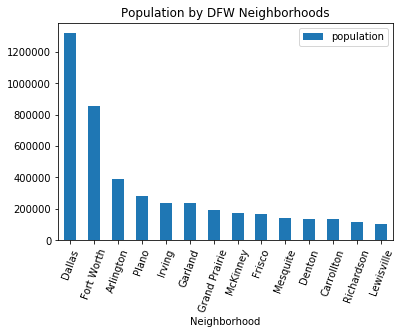

In [838]:
dfw_population.plot.bar(x="Neighborhood", y="population", rot=70, title="Population by DFW Neighborhoods")

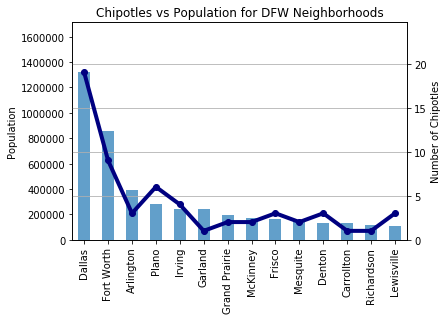

In [800]:
import seaborn as sns

fig = plt.figure()
ax = dfw_population['population'].plot(kind="bar", alpha=0.7)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dfw_population['Chipotle_Count'],marker='o', c='navy', linewidth=4)

ax.set_xticklabels(dfw_population['Neighborhood'])
ax.set_ylim(0,1.3*dfw_population['population'].max())
ax2.set_ylim(0,1.3*dfw_population['Chipotle_Count'].max())
ax2.grid(True)

ax.set_ylabel('Population')
ax2.set_ylabel('Number of Chipotles')
ax2.set_xlabel('Neighborhood')
ax2.set_title('Chipotles vs Population for DFW Neighborhoods')

plt.show()

In [839]:
#Viewing cities by median_age
dfw_crime=df_final_model_data[['Neighborhood', 'Median_Age']].sort_values(by=['Median_Age'], ascending=False).head(40)

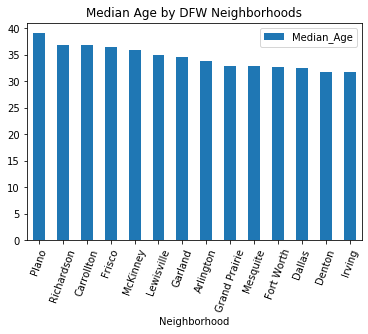

In [840]:
dfw_crime.plot.bar(x="Neighborhood", y="Median_Age", rot=70, title="Median Age by DFW Neighborhoods")

In [788]:
#Viewing cities by Median Household Income
dfw_income=df_final_model_data[['Neighborhood', 'median_household_income']].sort_values(by=['median_household_income'], ascending=False).head(40)

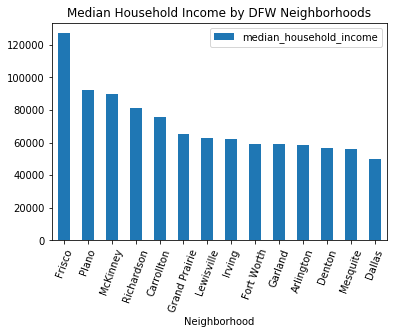

In [790]:
dfw_income.plot.bar(x="Neighborhood", y="median_household_income", rot=70, title="Median Household Income by DFW Neighborhoods")

In [846]:
dfw_neighborhood_median_age=df_final_model_data[['Neighborhood','Median_Age','median_household_income']].sort_values(by=['median_household_income'], ascending=False).head(40)

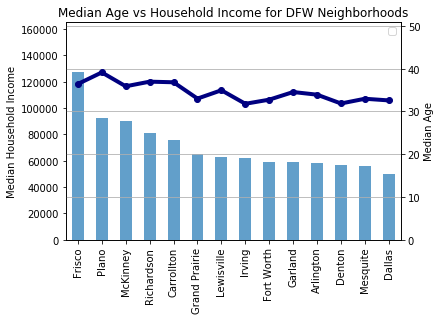

In [850]:
fig = plt.figure()
ax = dfw_neighborhood_median_age['median_household_income'].plot(kind="bar", alpha=0.7)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dfw_neighborhood_median_age['Median_Age'],marker='o', c='navy', linewidth=4)

ax.set_xticklabels(dfw_neighborhood_median_age['Neighborhood'])
ax.set_ylim(0,1.3*dfw_neighborhood_median_age['median_household_income'].max())
ax2.set_ylim(0,1.3*dfw_neighborhood_median_age['Median_Age'].max())
ax2.grid(True)

ax.set_ylabel('Median Household Income')
ax2.set_ylabel('Median Age')
ax2.set_xlabel('Neighborhood')
ax2.set_title('Median Age vs Household Income for DFW Neighborhoods')
plt.legend(loc="upper right")
plt.show()

In [785]:
#Viewing cities by crime rate
dfw_crime=df_final_model_data[['Neighborhood', 'crime_grade']].sort_values(by=['crime_grade'], ascending=False).head(40)

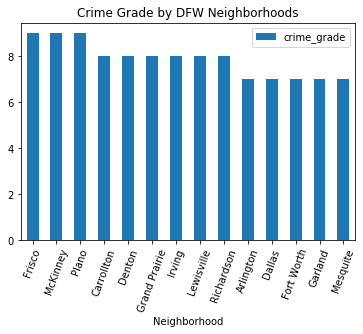

In [786]:
dfw_crime.plot.bar(x="Neighborhood", y="crime_grade", rot=70, title="Crime Grade by DFW Neighborhoods")

# BEGINNING MODELING USING K CLUSTERING

Normalizing the data

In [851]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_final_model_data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 2.15454463e-01, -6.32758024e-01, -7.10080495e-01,
        -1.07408425e+00,  5.22232968e-01, -2.89201396e-01,
         3.22700639e-02, -8.66025404e-01, -8.19891592e-01,
        -1.15470054e+00, -4.23659273e-01, -4.99230177e-01,
        -3.31294578e-01,  5.22232968e-01, -5.95683397e-01,
         0.00000000e+00,  1.15470054e+00, -3.10460210e-01,
         6.96310624e-01, -9.66282390e-01, -2.63922979e-01,
        -4.41726104e-01,  1.02463104e-01,  1.01254823e+00,
         7.90878412e-01,  8.46498972e-01, -1.44337567e-01,
        -2.08302258e+00],
       [-5.61650123e-01,  2.35829758e-01,  1.92293359e-01,
         2.04758537e-01, -9.40019342e-01,  1.06027975e+00,
        -4.77233898e-01,  1.15470054e+00,  7.45355992e-01,
         1.92450090e-01,  4.23659273e-01,  1.05393037e+00,
         4.41726104e-01,  5.22232968e-01,  1.62459108e-01,
         0.00000000e+00, -8.66025404e-01,  7.76150526e-01,
        -1.74077656e+00,  1.11494122e+00, -6.98619649e-01,
        -4.41726104e-01, -6.14

Applying K-means clustering to our dataset

In [852]:
clusterNum = 5 # initialized
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 1 0 1 2 4 1 1 1 1 4 1 4 1]


In [853]:
## Create a new column with cluster labels in the dataframe
df_final_model_data["Clus"] = labels

In [854]:
df_final_model_data

,Neighborhood,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,niche_grade,public_school_grade,...,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count,No_of_Educational_Institutions,Students_Enrollment,Eateries,Restaurants,Movie_Theaters,Clus
0,Arlington,392462,58502,157600,997,3.5,33.894161,7.136118,12,10,...,10,9,3.0,0.0,2.0,39934.0,46,34,1,3
1,Carrollton,133438,75820,217700,1175,3.2,36.792577,7.100000,14,13,...,8,11,1.0,0.0,0.0,0.0,48,38,0,1
2,Dallas,1318806,50100,169400,987,3.6,32.552906,7.083905,12,9,...,11,11,19.0,5.0,11.0,64669.0,34,25,4,0
3,Denton,133661,56489,196900,1046,3.1,31.834170,7.128338,13,12,...,8,11,3.0,0.0,3.0,63778.0,39,23,1,1
4,Fort Worth,855786,59255,154300,1015,3.6,32.726637,7.135108,12,8,...,9,10,9.0,1.0,3.0,16446.0,22,10,0,2
5,Frisco,165700,127133,368000,1441,3.2,36.400000,7.300000,14,14,...,9,9,3.0,0.0,0.0,0.0,44,29,1,4
6,Garland,237982,58999,146200,1078,3.5,34.511026,7.085890,12,11,...,10,10,1.0,0.0,1.0,1452.0,42,32,1,1
7,Grand Prairie,191104,65249,151300,1058,3.7,32.978985,7.077367,12,10,...,10,9,2.0,0.0,0.0,0.0,35,24,1,1
8,Irving,238637,61937,165000,1086,3.3,31.765952,7.032970,13,11,...,10,11,4.0,1.0,2.0,12957.0,49,36,2,1
9,Lewisville,104789,63056,190300,1165,3.2,34.928404,7.130756,13,13,...,9,10,3.0,0.0,0.0,0.0,34,25,1,1


In [855]:
## Centroid values for each cluster
df_final_model_data.groupby('Clus').mean()

,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,niche_grade,public_school_grade,crime_grade,...,health_grade,outdoor_activities_grade,commute_grade,Chipotle_Count,Shakeshack_Count,No_of_Educational_Institutions,Students_Enrollment,Eateries,Restaurants,Movie_Theaters
Clus,,,,,,,,,,,,,,,,,,,,,
0,1318806.000,50100.000000,169400.000000,987.000000,3.6000,32.552906,7.083905,12.00,9.000,7.00,...,9.000000,11.000,11.000000,19.000000,5.000000,11.0,64669.00,34.000,25.000000,4.000000
1,162282.875,64822.125000,180825.000000,1126.125000,3.3625,34.086187,7.094415,12.75,11.625,7.75,...,9.250000,9.375,10.125000,2.125000,0.125000,1.0,14899.25,41.625,29.625000,0.875000
2,855786.000,59255.000000,154300.000000,1015.000000,3.6000,32.726637,7.135108,12.00,8.000,7.00,...,8.000000,9.000,10.000000,9.000000,1.000000,3.0,16446.00,22.000,10.000000,0.000000
3,392462.000,58502.000000,157600.000000,997.000000,3.5000,33.894161,7.136118,12.00,10.000,7.00,...,9.000000,10.000,9.000000,3.000000,0.000000,2.0,39934.00,46.000,34.000000,1.000000
4,207913.000,103072.666667,313533.333333,1347.666667,3.3000,37.117038,7.254392,14.00,14.000,9.00,...,11.333333,9.000,9.333333,3.666667,0.333333,0.0,0.00,43.000,26.666667,1.333333


# INSIGHTS

Population: 1,2,3,4,0

Youngest Clusters: 1, 2, 3,0,4

Income: 4,0,2,3,1

Home Value: 4,0,1,3,2 : We can see that cluster 1 has the lowest income yet the home values are not the lowest. Tbis could make cluster 1 a higher risk location during difficult economic times as no. of customers earting our could be the lowest here

Lowest Crime: 4,0,1,2,3

Chipotle # Shake Shack Count: 1, 2,4,3,0

Education Institutions: 1, 2, 3 

Students: 1, 3, 2

Eateries: 3,4,0,2,1

Restaurants: 3,0,4,1,2

Movie Theaters: 1,4,3,0

4 has highest people making the most income, lowest crime rate, second highest eateries suggesting demand, thrid highest in restaurants suggesting potential (not saturated)


In [707]:
#Adding lats and longs back to the data in order to visualize

In [856]:
dfw_clustered_data = pd.merge(df_final_model_data, df_final[['Neighborhood','Latitude','Longitude']], how = 'left', left_on = 'Neighborhood', right_on = 'Neighborhood')
dfw_clustered_data

,Neighborhood,population,median_household_income,median_home_value,median_rent,Unemployment_Rate,Median_Age,Climate_Comfort_Index,niche_grade,public_school_grade,...,Chipotle_Count,Shakeshack_Count,No_of_Educational_Institutions,Students_Enrollment,Eateries,Restaurants,Movie_Theaters,Clus,Latitude,Longitude
0,Arlington,392462,58502,157600,997,3.5,33.894161,7.136118,12,10,...,3.0,0.0,2.0,39934.0,46,34,1,3,32.634203,-97.14403
1,Carrollton,133438,75820,217700,1175,3.2,36.792577,7.100000,14,13,...,1.0,0.0,0.0,0.0,48,38,0,1,32.960374,-96.89163
2,Dallas,1318806,50100,169400,987,3.6,32.552906,7.083905,12,9,...,19.0,5.0,11.0,64669.0,34,25,4,0,32.787629,-96.79941
3,Denton,133661,56489,196900,1046,3.1,31.834170,7.128338,13,12,...,3.0,0.0,3.0,63778.0,39,23,1,1,33.226598,-97.13061
4,Fort Worth,855786,59255,154300,1015,3.6,32.726637,7.135108,12,8,...,9.0,1.0,3.0,16446.0,22,10,0,2,32.972998,-97.35592
5,Frisco,165700,127133,368000,1441,3.2,36.400000,7.300000,14,14,...,3.0,0.0,0.0,0.0,44,29,1,4,33.143792,-96.83938
6,Garland,237982,58999,146200,1078,3.5,34.511026,7.085890,12,11,...,1.0,0.0,1.0,1452.0,42,32,1,1,32.920574,-96.62639
7,Grand Prairie,191104,65249,151300,1058,3.7,32.978985,7.077367,12,10,...,2.0,0.0,0.0,0.0,35,24,1,1,32.759922,-97.01216
8,Irving,238637,61937,165000,1086,3.3,31.765952,7.032970,13,11,...,4.0,1.0,2.0,12957.0,49,36,2,1,32.872386,-96.98524
9,Lewisville,104789,63056,190300,1165,3.2,34.928404,7.130756,13,13,...,3.0,0.0,0.0,0.0,34,25,1,1,33.048670,-96.99321


In [857]:
# Identifying the co-ordinates for Philadelphia
address = 'Dallas, TX'

geolocator = Nominatim(user_agent="dfw_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of DFW are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of DFW are 32.7762719, -96.7968559.


In [858]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)
kclusters = 5

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfw_clustered_data['Latitude'], dfw_clustered_data['Longitude'], dfw_clustered_data['Neighborhood'], dfw_clustered_data['Clus']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters